In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import os
import glob
from past.builtins import xrange
import sys

from config import config
from utils import descriptors

In [14]:
from datasets import datasets

train_image_paths = datasets.get_train_image_paths()
print(train_image_paths.shape)

(1000,)


In [16]:
m = train_image_paths.shape[0];
n = 25;
descriptori_img = np.zeros((train_image_paths.shape[0], n))
for i in range(m):
    img = cv2.imread(train_image_paths[i])
    for j in range(n - 1):
        descriptori_img[i][j] = descriptors.color_descriptor(img)[j]
    descriptori_img[i][n - 1] = descriptors.contrast_descriptor(img)
print(descriptori_img.shape)


(1000, 25)


In [17]:
for i in range(m):
    for j in range(n):
        k = open(config["misc"]["descriptors_filepath"], "a")
        k.write(str(descriptori_img[i][j]) + ' ')
    k.write('\n')
    k.close()
print('Train descriptors ready!')
        

Train descriptors ready!


In [27]:
img=cv2.imread(config["misc"]["example_1_image_filepath"])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
layer = img.copy()
gp = [layer]
descriptor_contrast = 0
for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
layer = gp[5]
lap_pyr = [layer]
for i in range(5, 0, -1):
    size = (gp[i - 1].shape[1], gp[i - 1].shape[0])
    gaussian_extend = cv2.pyrUp(gp[i], dstsize = size)
    laplacian = cv2.subtract(gp[i - 1], gaussian_extend)
    lap_pyr.append(laplacian)
for i in range(1, 6):
    m, n = lap_pyr[i].shape
    contrast_lvl = 0
    for j in range (m):
        for k in range (n):
            contrast_lvl  = contrast_lvl + int(lap_pyr[i][j][k]) * int(lap_pyr[i][j][k])
    contrast_lvl = contrast_lvl/(m * n * np.power(2, 5 - i))
    print('nivelul ',(6 - i) , contrast_lvl)
    descriptor_contrast = descriptor_contrast + contrast_lvl
print('valoarea totala a descriptorului ', descriptor_contrast)

nivelul  5 2.80810546875
nivelul  4 7.873046875
nivelul  3 15.2564697265625
nivelul  2 19.5362548828125
nivelul  1 23.284637451171875
valoarea totala a descriptorului  68.75851440429688


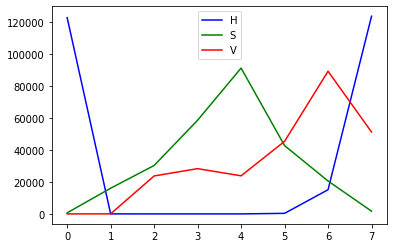

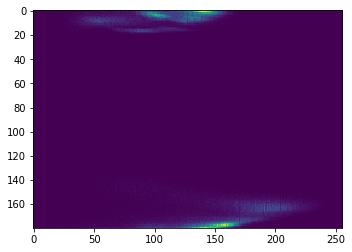

In [44]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(config["misc"]["example_2_image_filepath"])
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
levels = 8
hhist = cv2.calcHist([hsv_image],[0], None, [levels], [0, 180] )
shist = cv2.calcHist([hsv_image],[1], None, [levels], [0, 255] )
vhist = cv2.calcHist([hsv_image],[2], None, [levels], [0, 255] )

fig, ax = plt.subplots()
ax.plot(hhist, 'b', label='H')
ax.plot(shist, 'g', label='S')
ax.plot(vhist, 'r', label='V')

legend = ax.legend(loc='upper center')

# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('C1')

plt.show()

hist = cv.calcHist( [hsv_image], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist, interpolation = 'nearest')
plt.show()

In [18]:
for i in range (6):
    cv2.imshow('niv 0',lap_pyr[i])
    cv2.waitKey(0)
    
cv2.destroyAllWindows()